In [82]:
# do not touch this cell 
%load_ext jupyter_record


The jupyter_record extension is already loaded. To reload it, use:
  %reload_ext jupyter_record


In [3]:
%%git_commit

import pandas as pd
import numpy as np

In [ ]:
%%git_commit
dataset.keys()

In [ ]:
%%git_commit

dropped_column = ['DepTime', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 'ActualElapsedTime', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk', 'DistanceGroup', 'DivAirportLandings']

In [ ]:
%%git_commit

for column in dropped_column:
    dataset = dataset.drop(column, axis = 1)
    

In [ ]:
%%git_commit
df = dataset.dropna()

# Evaluate Departure Delay 


TODOS
- Define Subset of features
- For each feature, convert to appropriate value
- Test time series prediction, normal prediction


In [ ]:
%%git_commit

training = pd.read_csv('../archive/Combined_Flights_2018.csv')
testing = pd.read_csv('../archive/Combined_Flights_2019.csv')


In [ ]:
%%git_commit

testing


In [ ]:
%%git_commit
training

In [ ]:
%%git_commit

training = training.dropna()
testing = testing.dropna()

In [ ]:
%%git_commit

dropped_column = ['Flight_Number_Marketing_Airline', 'Flight_Number_Operating_Airline', 'DepTime', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 'ActualElapsedTime', 'DepDelayMinutes', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk', 'DistanceGroup', 'DivAirportLandings']




In [ ]:
%%git_commit

for column in dropped_column:
    training = training.drop(column, axis = 1)
    testing = testing.drop(column, axis = 1)
    

In [ ]:
%%git_commit

training.keys()


In [ ]:
%%git_commit

d2_column = ['FlightDate', 'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners' ,  'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline', 'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline', 'OriginAirportSeqID', 'DestAirportSeqID', 'CRSArrTime', 'DestStateName', 'DestState', 'DestCityName', 'OriginStateName', 'OriginState', 'OriginCityName','Year',  'Diverted', 'Cancelled', 'Tail_Number']




In [ ]:
%%git_commit

for column in d2_column:
    training = training.drop(column, axis = 1)
    testing = testing.drop(column, axis = 1)

In [ ]:
%%git_commit

testing.keys()

In [ ]:
%%git_commit

for col in training:
    print(col)
    print(training[col].unique())

In [ ]:
%%git_commit

one_hot = ['DestWac', 'DestStateFips', 'DestCityMarketID', 'DestAirportID', 'OriginWac', 'OriginStateFips', 'OriginCityMarketID', 'OriginAirportID', 'Operating_Airline', 'DayOfWeek', 'Month', 'Quarter', 'Dest', 'Origin', 'Airline' ]

In [ ]:
%%git_commit

from sklearn.preprocessing import OneHotEncoder



In [ ]:
%%git_commit

encode = OneHotEncoder(handle_unknown = 'ignore')

array = []
array_test = []
for hot in one_hot:
    print(hot)
    x = encode.fit_transform(training[hot].to_numpy().reshape(-1, 1))
    y = encode.transform(testing[hot].to_numpy().reshape(-1, 1))
    print(x.shape)
    array.append(x)
    array_test.append(y)


In [ ]:
%%git_commit

not_hot = []
for key in training.keys():
    if key not in one_hot:
        not_hot.append(key)
        
print(not_hot)

In [ ]:
%%git_commit

for i in range(len(array)):
    print(array[i].shape)



In [ ]:
%%git_commit

from scipy.sparse import hstack



In [ ]:
%%git_commit

col_2 = ['CRSDepTime', 'CRSElapsedTime', 'Distance', 'DayofMonth']

for col in col_2:
    x = training[col].to_numpy().reshape(-1, 1)
    y = testing[col].to_numpy().reshape(-1, 1)
    array.append(x)
    array_test.append(y)

In [ ]:
%%git_commit

X_train = hstack(array)
X_test = hstack(array_test)

In [ ]:
%%git_commit

y_train = training['DepDel15'].to_numpy().reshape(-1)
y_test = testing['DepDel15'].to_numpy().reshape(-1)


In [ ]:
%%git_commit

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
%%git_commit

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [ ]:
%%git_commit


model = RandomForestClassifier(max_samples = 0.01, min_samples_leaf = 100)
model.fit(X_train, y_train)

In [ ]:
%%git_commit

y_out = model.predict(X_test)



In [ ]:
%%git_commit


y_out = model.predict(X_test)
matrix = confusion_matrix(y_test, y_out)
display = ConfusionMatrixDisplay(matrix)
display.plot()
plt.show()

# Evaluate Arrival Delay



TODOS
- Define Subset of features
- For each feature, convert to appropriate value
- Test time series prediction, normal prediction


In [63]:
%%git_commit

training = pd.read_csv('../archive/Combined_Flights_2018.csv').sample(100000)
testing = pd.read_csv('../archive/Combined_Flights_2019.csv')


In [64]:
%%git_commit


training = training.dropna()
testing = testing.dropna()


In [65]:
%%git_commit


dropped_column = ['ArrDelayMinutes', 'Flight_Number_Marketing_Airline', 'Flight_Number_Operating_Airline', 'DepDelay', 'ArrTime', 'AirTime', 'ActualElapsedTime', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'ArrDelay', 'ArrivalDelayGroups', 'ArrTimeBlk', 'DistanceGroup', 'DivAirportLandings']




In [66]:
%%git_commit

for column in dropped_column:
    training = training.drop(column, axis = 1)
    testing = testing.drop(column, axis = 1)
    
    

In [67]:
%%git_commit

training.keys()


Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'CRSElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Operating_Airline', 'DOT_ID_Operating_Airline',
       'IATA_Code_Operating_Airline', 'Tail_Number', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'CRSArrTime', 'ArrDel15'],
      dtype='object')

In [68]:
%%git_commit

d2_column = ['FlightDate', 'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners' ,  'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline', 'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline', 'OriginAirportSeqID', 'DestAirportSeqID', 'CRSArrTime', 'DestStateName', 'DestState', 'DestCityName', 'OriginStateName', 'OriginState', 'OriginCityName','Year',  'Diverted', 'Cancelled', 'Tail_Number']


In [69]:
%%git_commit

for column in d2_column:
    training = training.drop(column, axis = 1)
    testing = testing.drop(column, axis = 1)


In [70]:
%%git_commit

testing.keys()


Index(['Airline', 'Origin', 'Dest', 'CRSDepTime', 'DepTime', 'DepDelayMinutes',
       'CRSElapsedTime', 'Distance', 'Quarter', 'Month', 'DayofMonth',
       'DayOfWeek', 'Operating_Airline', 'OriginAirportID',
       'OriginCityMarketID', 'OriginStateFips', 'OriginWac', 'DestAirportID',
       'DestCityMarketID', 'DestStateFips', 'DestWac', 'DepDel15', 'ArrDel15'],
      dtype='object')

In [71]:
%%git_commit

from sklearn.preprocessing import OneHotEncoder

encode = OneHotEncoder(handle_unknown = 'ignore')

one_hot = ['DestWac', 'DestStateFips', 'DestCityMarketID', 'DestAirportID', 'OriginWac', 'OriginStateFips', 'OriginCityMarketID', 'OriginAirportID', 'Operating_Airline', 'DayOfWeek', 'Month', 'Quarter', 'Dest', 'Origin', 'Airline' ]

array = []
array_test = []
for hot in one_hot:
    print(hot)
    x = encode.fit_transform(training[hot].to_numpy().reshape(-1, 1))
    y = encode.transform(testing[hot].to_numpy().reshape(-1, 1))
    print(x.shape)
    array.append(x)
    array_test.append(y)


DestWac
(98013, 52)
DestStateFips
(98013, 52)
DestCityMarketID
(98013, 342)
DestAirportID
(98013, 366)
OriginWac
(98013, 52)
OriginStateFips
(98013, 52)
OriginCityMarketID
(98013, 341)
OriginAirportID
(98013, 365)
Operating_Airline
(98013, 28)
DayOfWeek
(98013, 7)
Month
(98013, 12)
Quarter
(98013, 4)
Dest
(98013, 366)
Origin
(98013, 365)
Airline
(98013, 28)


In [72]:
%%git_commit

not_hot = []
for key in training.keys():
    if key not in one_hot:
        not_hot.append(key)
        
print(not_hot)


['CRSDepTime', 'DepTime', 'DepDelayMinutes', 'CRSElapsedTime', 'Distance', 'DayofMonth', 'DepDel15', 'ArrDel15']


In [73]:
%%git_commit

from scipy.sparse import hstack


In [74]:
%%git_commit


col_2 = ['CRSDepTime', 'DepTime', 'DepDelayMinutes', 'CRSElapsedTime', 'Distance', 'DayofMonth', 'DepDel15']

#col_2 = ['CRSDepTime', 'DepTime', 'CRSElapsedTime', 'Distance', 'DayofMonth']

for col in col_2:
    x = training[col].to_numpy().reshape(-1, 1)
    y = testing[col].to_numpy().reshape(-1, 1)
    array.append(x)
    array_test.append(y)
    

In [75]:
%%git_commit

X_train = hstack(array)
X_test = hstack(array_test)


In [76]:
%%git_commit

y_train = training['ArrDel15'].to_numpy().reshape(-1)
y_test = testing['ArrDel15'].to_numpy().reshape(-1)


In [83]:
%%git_commit

X_train = training.loc[:, ['DepDel15', 'DepDelayMinutes', 'DepTime']].to_numpy()
X_test = testing.loc[:, ['DepDel15', 'DepDelayMinutes', 'DepTime']].to_numpy()


In [77]:
%%git_commit

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(98013, 2439)
(7917263, 2439)
(98013,)
(7917263,)


In [ ]:
%%git_commit

y_test[y_test > 500] = 500
y_train[y_train > 500] = 500

In [ ]:
%%git_commit
import matplotlib.pyplot as plt
plt.hist(y_test, bins=9)


In [38]:
%%git_commit

# REGRESSION TEST

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix

In [ ]:
%%git_commit

#model = RandomForestRegressor(max_samples = 0.01, min_samples_leaf = 100)
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
%%git_commit

y_out = model.predict(X_test)
print(explained_variance_score(y_test, y_out))

In [ ]:
%%git_commit
plt.hist(y_out, bins=100)

In [84]:
%%git_commit


#model = RandomForestClassifier(max_samples = 0.01, min_samples_leaf = 100)
model = RandomForestClassifier(min_samples_leaf = 100)
model.fit(X_train, y_train)


RandomForestClassifier(min_samples_leaf=100)

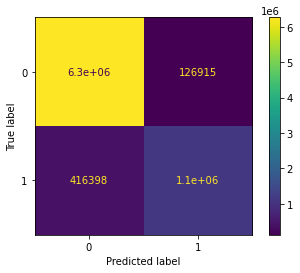

In [85]:
%%git_commit

y_out = model.predict(X_test)
matrix = confusion_matrix(y_test, y_out)
display = ConfusionMatrixDisplay(matrix)
display.plot()


In [86]:
%%git_commit

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_out))


0.931376158654828


In [ ]:
%%git_commit
